# The simple spatial SIR model

## The case - 1D queue

Consider a queue of people waiting in front of a drugstore. Some of them are ill, some have just come to buy medicine for their beloved ones. Some are standing alone, some are couples or whole families...
What is the probabilty that the susceptible people would get infected?

A ***1D queue*** example shall allows us to observe the spatial effects and make some general conclusions before setting up a more real, 2D model.

How does the people behave? Do they swap their places in the queue? What is the distance at which an individual may get infected?

Let us start with the already presented SIR system:

\begin{align*}
\frac{\partial}{\partial t} S &= - \beta \frac{S}{N}I  \\
\frac{\partial}{\partial t} I &= \beta \frac{S}{N}I - \gamma I \\
\frac{\partial}{\partial t} R &= \gamma I
\end{align*}


## The spatial effect

The disease may spread to neighbours with some probability $P(r)$, where $r$ is the "infectious" distance.
Various functions can be choosen to model $P(r)$.

Comparing to 0D SIR, we have to take into account interaction between two functions. 
First accounts for the spatial distribution of infected individuals $I(x)$, 
while the second describes the distance at which infection may occour $P(r)$, where $r = x-x_0$

From a mathematical perspective, the resulting interaction can be writen as a convolution of these two functions.
Now, the ***viral load***, $W$,  can be defined as:

$$
W = I \star P(r)
$$

Next, the rate of change of infected people can be generalized as:

$$
\frac{\partial}{\partial t} I =  \beta \frac{S}{N}W  - \gamma I
$$

Notice, that the $0D$ case corresponds to $P(r) = \delta $, where $ \delta $ is the Dirac distribution.



## Choice of the "infectious" operator

Let us investigate four basic distributions.


1) The simplest choice is to assume, that an individual can get become infected (with constant probability) if he/she is located within a ***circe*** of radius $r$.

$$
W = I \star [\text{disc of radius r}],
$$

2) which can be (explicitly) approximated as [1],

$$
W \approx I + \frac{r^2}{8} \Delta I.
$$

3) An alternative (implicit) approximation is,

$$
W - \frac{r^2}{8} \Delta W \approx I 
$$

4) Finally, assuming, that the probability of getting infected at some distance has a normal distribution,

$$
W  = I \star Gaussian(\sigma)
$$

---

[1] "Continuous and discrete SIR-models with spatial distributions" Seong-Hun Paeng and Jonggul Lee, Journal of Mathematical Biology, 2016




## Comparison of "infectious" operators in the frequency domain

Let us remind basic properties of the Fourier transform:
\begin{align*}
\mathcal F (\delta) &= 1 \\
\mathcal F (\nabla u) &= - k^2 \mathcal F(u)\\
\mathcal F (u \star v) &= \mathcal F (u) \mathcal F (v) \\
\mathcal F (C_1 u + C_2 v) &= C_1 \mathcal F(u)+ C_2 \mathcal F(v)  
\end{align*}

The [frequency responce](https://en.wikipedia.org/wiki/Transfer_function), $G$, ([Transmitancja widmowa](https://pl.wikipedia.org/wiki/Transmitancja_widmowa)) describes the 
ratio of the output amplitude,Y, to the input amplitude, X, for each frequency $\omega$.
The ***gain*** is defined as absolute value of the system frequency responce.
(Moduł transmitancji widmowej opisuje wzmocnienie układu.)

$$
G(j \omega) = \frac{Y}{X} 
$$

where $X$ and $Y$ denote the Fourier transform of the *input* and *output* signal respectively.

The frequency responce for each of the "infectious" operators can be calculated as follows:

\begin{align*}
G_1 &= \frac{\mathcal F (I + \frac{r^2}{8} \Delta I)}{F (I)} =  \frac{\mathcal F (I ) - k^2 \frac{r^2}{8} \mathcal F ( I))}{\mathcal F ( I)} = 1 - k^2 \frac{r^2}{8} \\
G_2 &= \frac{\mathcal F (I )}{ \mathcal F (I - \frac{r^2}{8} \Delta I)} = \frac{1}{1 + k^2 \frac{r^2}{8}} \\
G_3 &= \frac{\mathcal F (I \star \text{[disc of radius r]})}{ \mathcal F (I)} = \frac{2 * besselJ(k r,1)}{kr} \\
G_4 &= \frac{\mathcal F (I \star Gaussian(\sigma=r/2)}{\mathcal F (I)} = exp\left((-kr)^{2/8} \right)
\end{align*}

### Notice: 


- the input, $X$, in $G_2$ is implicit.
- the frequency responce is related to the continous (not discrete) operator.


![Operators](../images/operators.png)



### Remarks

- Q1 What is the interpretation of the negative values?
- A1 For frequencies where negative values occurs, the spread of the disease may become unphysical. The high frequency for $W = I + \frac{r^2}{8} \Delta I$ ***continous*** operator tends to infinity, thus such IC is expected to diverge.

- Q2 Does the frequency responce for the discrete operators follows the same plot?
- A2 No. The responce for higher frequencies becomes flattened by a discrete operator. The lower the order of a FD stencil, the more flattened the responce. 

- Q3 What are the pros / cons of convolution with some reasonable function (like Gaussian) vs its approximation?
- A3 Approximation (laplacian term) is more local than convolution. As a result, the algorithm is computationally faster. Moreover, imposing BC for an equation which includes a laplacian term is far easier than with convolution.

- Q4 Are there any other differences between $W = I + \frac{r^2}{8} \Delta I$ and $W - \frac{r^2}{8} \Delta W= I$ approximations apart from frequency responce?


## The spatial SIR system

Let us use the simplest approximation [1],

\begin{align*}
\frac{\partial}{\partial t} S &= - \beta \frac{S}{N}(I + \frac{r^2}{8} \Delta I)  \\
\frac{\partial}{\partial t} I &= \beta \frac{S}{N}(I + \frac{r^2}{8} \Delta I) - \gamma I \\
\frac{\partial}{\partial t} R &= \gamma I
\end{align*}

Substituting $W  = I + \frac{r^2}{8} \Delta I$,

\begin{align*}
\frac{\partial}{\partial t} S &=  - \beta \frac{S}{N}W \\
\frac{\partial}{\partial t} I &= \beta \frac{S}{N}W - \gamma I \\
\frac{\partial}{\partial t} R &= \gamma I
\end{align*}

Notice that the diffusivity depends on $S$, which is decreasing in time.


## The low diffusivity issue and the spatial WSIR remedy


Low values of the diffusivity coefficient can lead to stability problems in the numerical algorithms.

To avoid numerical issues, the $W$, is simulated as an additional field.

$W$ is relaxed (with $\beta_W$ coefficient) to $ W - \Delta W\frac{r^2}{8} = I $.

The WSIR system reads:
\begin{align*}
\frac{\partial}{\partial t} W &= \beta_W \left[ \frac{r^2}{8} \Delta W + (I-W) \right] \\
\frac{\partial}{\partial t} S &= - \beta \frac{S}{N}W\\
\frac{\partial}{\partial t} I &= \beta \frac{S}{N}W - \gamma I \\
\frac{\partial}{\partial t} R &= \gamma I
\end{align*}




## The nondimensional form equations - revisited

Again, we can rescale the time as $\tau = \gamma t$, then the set of equations can be described by single similarity number $R_{0}=\frac {\beta }{\gamma }$

\begin{align*}
\frac{\partial}{\partial \tau} S &= - R_0 \frac{S}{N}(I + \frac{r^2}{8} \Delta I)  \\
\frac{\partial}{\partial \tau} I &= R_0 \frac{S}{N}(I + \frac{r^2}{8} \Delta I) - I \\
\frac{\partial}{\partial \tau} R &= I
\end{align*}

The WSIR system reads:
\begin{align*}
\frac{\partial}{\partial \tau} W &= \frac{\beta_W}{\gamma} \left[ \frac{r^2}{8} \Delta W + (I-W) \right] \\
\frac{\partial}{\partial \tau} S &= -  R_0  \frac{S}{N}W\\
\frac{\partial}{\partial \tau} I &= R_0  \frac{S}{N}W - \ I \\
\frac{\partial}{\partial \tau} R &= I
\end{align*}


# Remarks on other SIR-diffusion models

There are models [2], in which the diffusion acts as an *independent* operator for each of the compartments, 

\begin{align*}
\frac{\partial}{\partial t} S &= - \beta \frac{S}{N}I + k_S \Delta S  \\
\frac{\partial}{\partial t} I &= \beta \frac{S}{N}I - \gamma I + k_I \Delta I\\
\frac{\partial}{\partial t} R &= \gamma I + k_R \Delta R
\end{align*}

where $k_{S,I,R}$ denotes the diffusion coefficient for particular compartment.

According to [1], such models does not capture physics of the epidemy because:

- a) almost all humans moves within a small fixed radius and does not disperse in a manner such as Brownian motion.

- b) equation cannot explain the spatial transmission by infection if individuals are at rest.

- c) humans would move away from an increasing gradient of the infected.

- d) humans would move away from over-crowded locations.

Consequently, the spatial transmission described by [2] is caused not by infection but by the dispersion of patients.

Inspired by the heat transfer equation:

\begin{align*}
\frac{\partial}{\partial t} \rho T = \nabla \cdot  k \nabla T + \dot{q}
\end{align*}

One can mitigate the escape of humans from *over-crowded* locations by using fractions in the laplacian term.

Notice, that this will be  **a different model**: $ \frac{1}{N} \nabla \cdot k_s \nabla S \neq  \nabla \cdot k_s \nabla s$ because $N$ is a spatial variable:

\begin{align*}
\frac{\partial}{\partial t} S = \frac{\partial}{\partial t} N s &= \nabla \cdot k_s \nabla s - \beta \frac{S}{N}I \\
\frac{\partial}{\partial t} I = \frac{\partial}{\partial t} N i &= \nabla \cdot k_i \nabla i + \beta \frac{S}{N}I  - \gamma I \\
\frac{\partial}{\partial t} R =\frac{\partial}{\partial t} N r &=  \nabla \cdot k_r \nabla r + \gamma I 
\end{align*}

Anyway, the drawbacks mentioned in $a)-c)$ still apply.

---

[2]  Modeling epidemics by the lattice Boltzmann method, De Rosis, Alessandro, Phys. Rev. E, 2020

## Exercise 

Implement a FD solver for both SIR-Peng and WSIR model.

In [1]:
import numpy as np              
import os
from numba import jit
import sys
sys.path.append("..")
from utils.sir_plot_utils import *
%matplotlib inline

In [2]:
nx = 128
domain_length = 64
dx = domain_length / (nx-1)
xspace = np.linspace(0, domain_length, nx)

r0 = 5.5  # infectious radius
beta_sir = 3.01  # the average number of contacts per person per time
gamma_sir = 1/2.8  # 1 over days to recovery

beta_W = 1e3

total_time = 1e-0
dt = 1e-5
ntimesteps = int(total_time / dt)

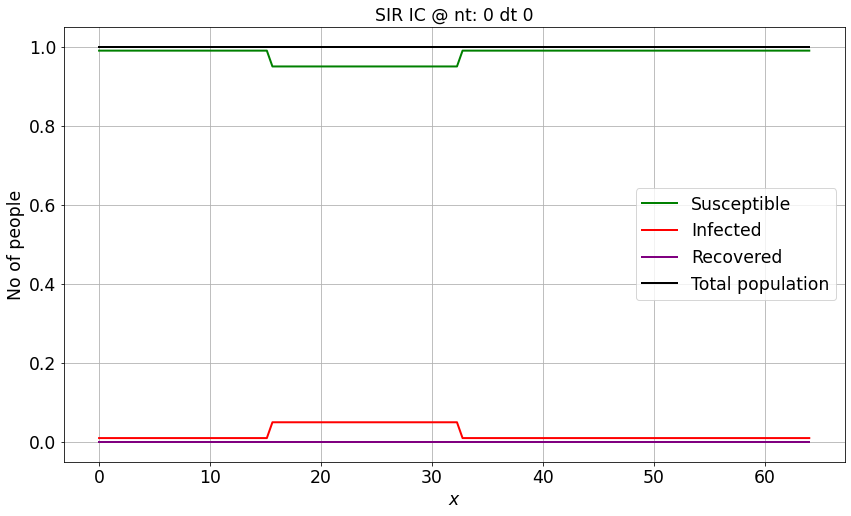

In [3]:
# Spatially uniform population density

I_IC = np.ones(nx)*0.01                # numpy function ones()
I_IC[int((nx-1)/4):int(nx/2 + 1)] = 0.05  # setting u = 2 between 0.5 and 1 as per our I.C.s
S_IC = np.ones(nx) - I_IC
R_IC = np.zeros(nx)

N = S_IC + I_IC + R_IC


make_wsir_plot_1D(S_IC, I_IC, R_IC, xspace, 0, 0, 'SIR IC')

In [4]:
    
# @jit(cache=True, nopython=True)
@jit(nopython=True)
def SIR_Peng_1D_FD_btcs(S, I, R, nx, dx, r0, beta_sir, gamma_sir, nt, dt):
    N = S + I + R
    
    c_ind = np.arange(0, nx)
    l_ind = np.roll(c_ind, -1)
    r_ind = np.roll(c_ind, 1)
    
    hist_of_diffusivity =  np.zeros((nt, nx), dtype=np.float64)
    for n in range(nt):  # iterate through time
        lap_I = (I[l_ind] - 2 * I[c_ind] + I[r_ind]) / dx ** 2
        qS2I_spatial = (r0 * r0 / 8.) * lap_I
        # qS2I_spatial = np.zeros(nx)
        
        hist_of_diffusivity[n] = beta_sir * S * qS2I_spatial
        qS2I = dt * beta_sir * S * (qS2I_spatial + I) / N
        qI2R = dt * gamma_sir * I
        S = S - qS2I
        I = I + qS2I - qI2R
        R = R + qI2R

    return S, I, R, hist_of_diffusivity


@jit(nopython=True)
def WSIR_1D_FD_btcs(S, I, R, nx, dx, r0, beta_sir, gamma_sir, nt, dt, beta_W=1e2):
    W = np.zeros(nx)
    N = S + I + R
    c_ind = np.arange(0, nx)
    l_ind = np.roll(c_ind, -1)
    r_ind = np.roll(c_ind, 1)

    for n in range(nt):  # iterate through time
        lap_W = (W[l_ind] - 2 * W[c_ind] + W[r_ind]) / dx ** 2
        qW_spatial = (r0 * r0 / 8.)*lap_W
        # qW_spatial = np.zeros(nx)

        qW = dt * beta_W * (qW_spatial + (I - W))
        qS2I = dt * beta_sir * S * W/N
        qI2R = dt * gamma_sir * I

        W = W + qW
        S = S - qS2I
        I = I + qS2I - qI2R
        R = R + qI2R
        
    return S, I, R, W


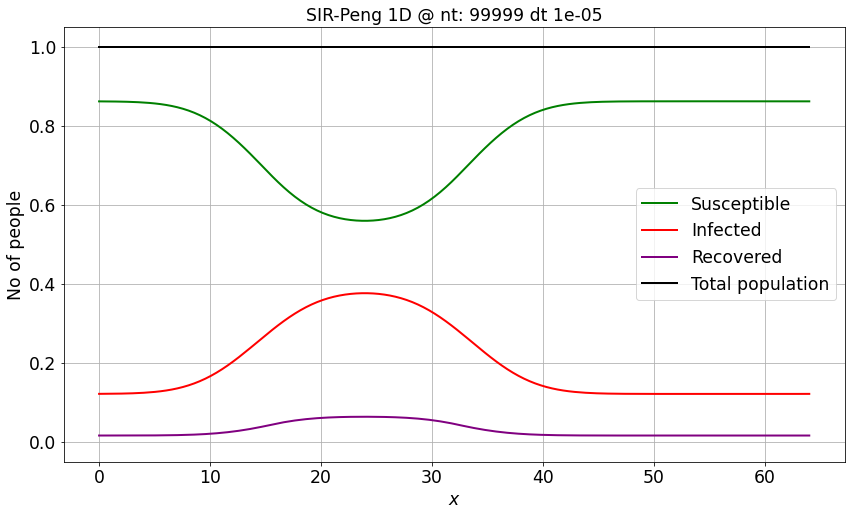

In [5]:
S, I, R, _ = SIR_Peng_1D_FD_btcs(S_IC, I_IC, R_IC, nx, dx, r0, beta_sir, gamma_sir, ntimesteps, dt)
make_wsir_plot_1D(S, I, R, xspace, ntimesteps, dt, 'SIR-Peng 1D')


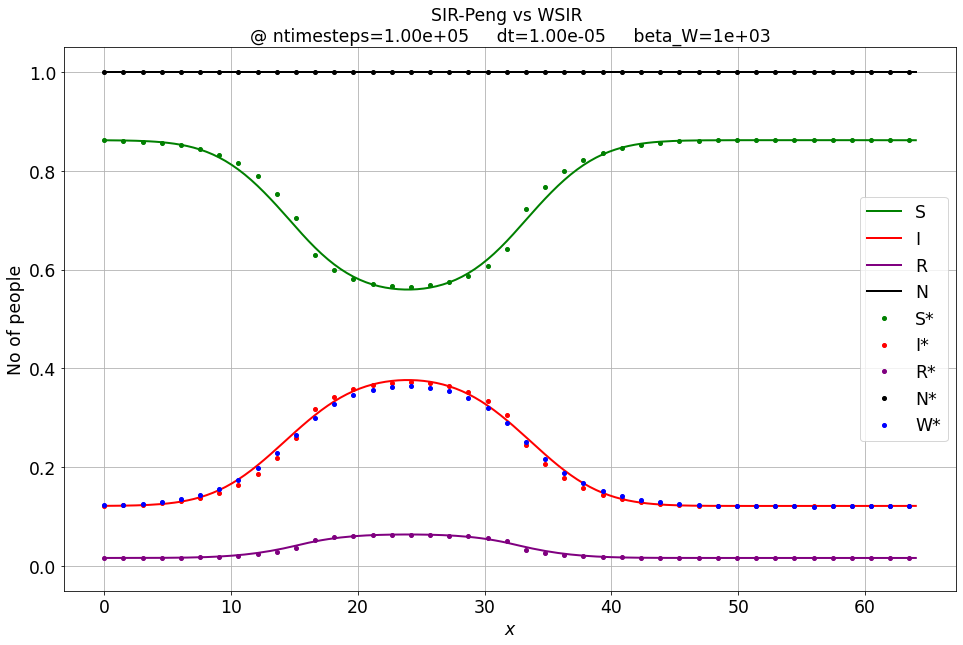

In [6]:
Sw, Iw, Rw, Ww = WSIR_1D_FD_btcs(S_IC, I_IC, R_IC, nx, dx, r0, beta_sir, gamma_sir, ntimesteps, dt, beta_W)
compare_sir_vs_wsir_plot((S, I, R), (Sw, Iw, Rw, Ww), beta_W, xspace, ntimesteps, 'SIR-Peng vs WSIR', dt)


# Effect of varing spatial density

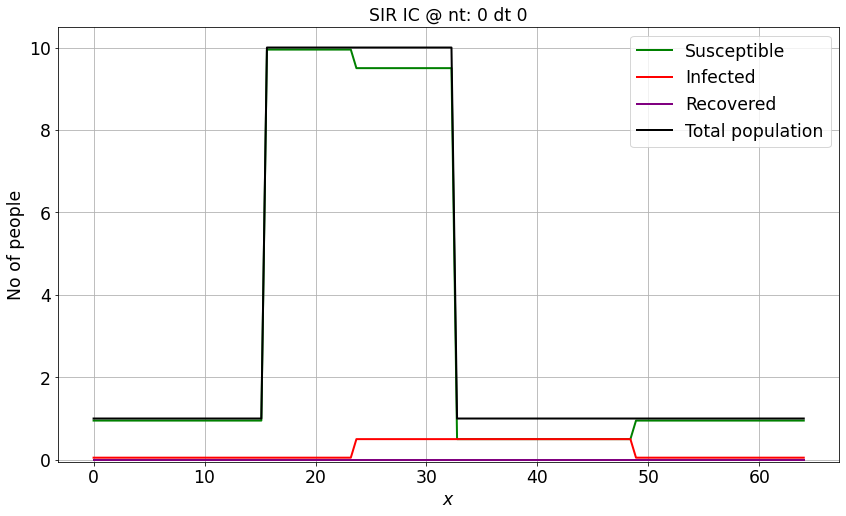

In [7]:
# signal = 2* np.pi*xspace/max(xspace) 
# signal = 10*np.ones(nx) + 500*np.sin(signal) 
# signal += abs(min(signal)) +1

# N = signal 
# N[int((nx-1)/4):int(nx/2 + 1)] =  1.2*signal[int((nx-1)/4):int(nx/2 + 1)]
# I_IC = 0.05* signal

N = np.ones(nx)
N[int((nx-1)/4):int(nx/2 + 1)] *= 10

I_IC = 0.05* np.ones(nx)
I_IC[int(3*(nx-1)/8):int(6*nx/8 + 1)] *= 10 

S_IC = N - I_IC
R_IC = np.zeros(nx)

y_lim  = [-0.05, 1.05*max(N)]
from utils.sir_plot_utils import make_wsir_plot_1D
make_wsir_plot_1D(S_IC, I_IC, R_IC, xspace, 0, 0, 'SIR IC', w=None, y_lim=y_lim)


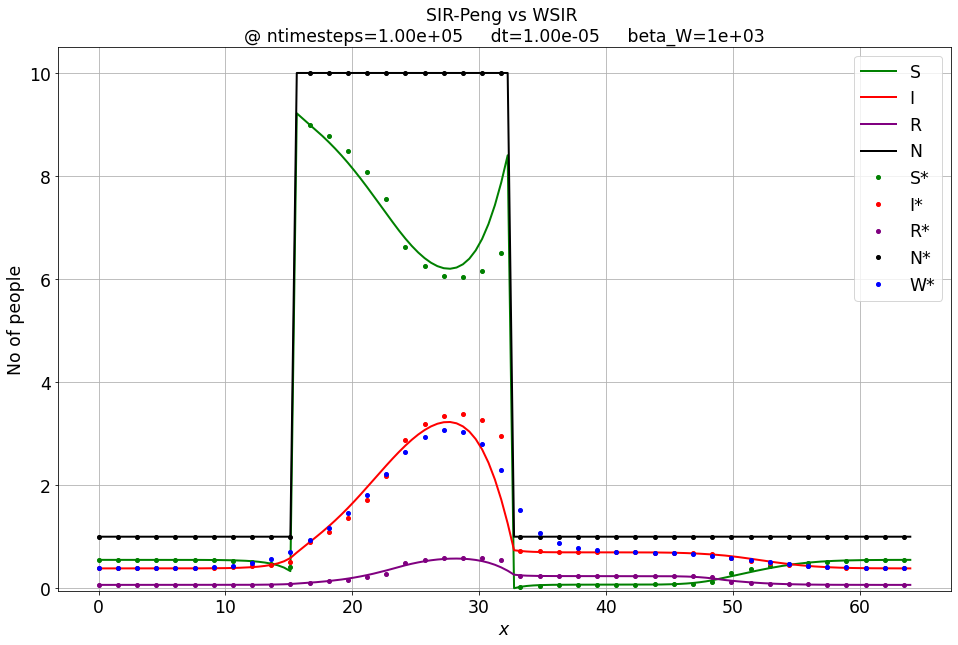

In [8]:
S, I, R, hist_of_diffusivity = SIR_Peng_1D_FD_btcs(S_IC, I_IC, R_IC, nx, dx, r0, beta_sir, gamma_sir, ntimesteps, dt)

Sw, Iw, Rw, Ww = WSIR_1D_FD_btcs(S_IC, I_IC, R_IC, nx, dx, r0, beta_sir, gamma_sir, ntimesteps, dt, beta_W)
compare_sir_vs_wsir_plot((S, I, R), (Sw, Iw, Rw, Ww), beta_W, xspace, ntimesteps, 'SIR-Peng vs WSIR', dt, y_lim=y_lim)

## Influence of the $ \beta_W $ relaxation coefficient

For $ \beta_W  \rightarrow \infty $ the W-SIR model converges to the Peng-SIR one.

### Exercise 

Experiment with different $ \beta_W $ and check the output.
Tip: You may need to decrease dt.


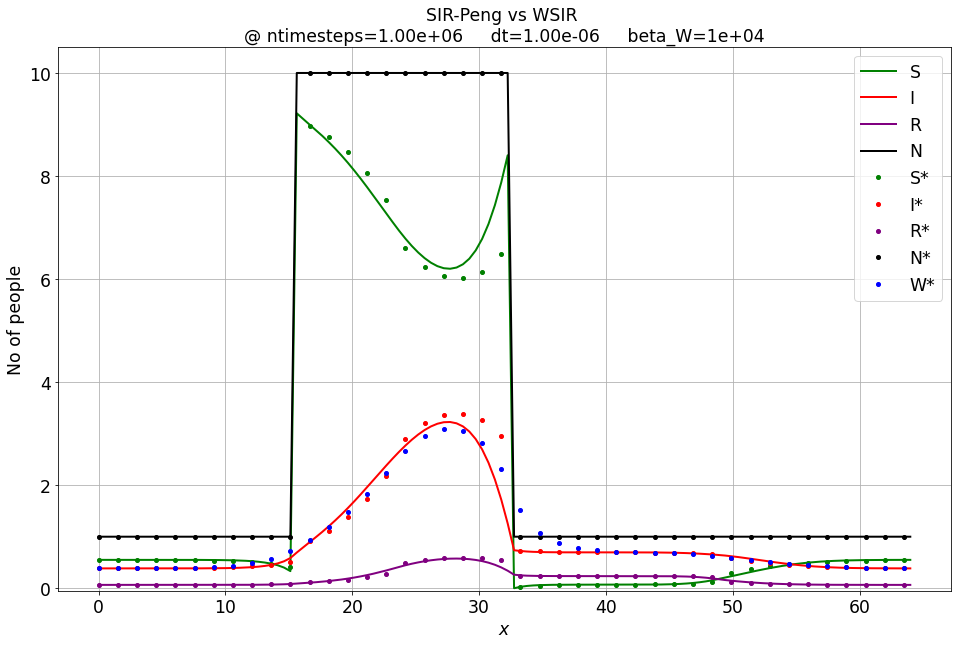

In [9]:
beta_W = 10*1e3 

total_time = 1e-0
dt = 0.1*1e-5
ntimesteps = int(total_time / dt)

S, I, R, hist_of_diffusivity = SIR_Peng_1D_FD_btcs(S_IC, I_IC, R_IC, nx, dx, r0, beta_sir, gamma_sir, ntimesteps, dt)

Sw, Iw, Rw, Ww = WSIR_1D_FD_btcs(S_IC, I_IC, R_IC, nx, dx, r0, beta_sir, gamma_sir, ntimesteps, dt, beta_W)
compare_sir_vs_wsir_plot((S, I, R), (Sw, Iw, Rw, Ww), beta_W, xspace, ntimesteps, 'SIR-Peng vs WSIR', dt, y_lim=y_lim)

## Numbers or fractions - revisited (for curious readers only)


This time, the task is more difficult.
First, let us remind the quotient rule for laplace operator:

<https://math.stackexchange.com/questions/652730/laplacian-identity>

\begin{align*}
\Delta\left(\frac{f}{g}\right) &= \frac{1}{g} \Delta f-\frac{2}{g} \nabla\left(\frac{f}{g}\right) \cdot \nabla g-\frac{f}{g^{2}} \Delta g \\
\rightarrow  \frac{1}{g} \Delta f &= \Delta\left(\frac{f}{g}\right)  + \frac{2}{g} \nabla\left(\frac{f}{g}\right) \cdot \nabla g +\frac{f}{g^{2}} \Delta g
\end{align*}

Again, we can divide each of the equations by $N$ to represent them in terms of fractions instead of numbers. 
Consider the spatial equation for $S$ from [1]:

\begin{align}
\frac{\partial}{\partial t} S &= - \beta \frac{S}{N} \left( I + \frac{r^2}{8} \Delta I \right) \hspace{3em} \text{dividing each side by N...} \\ 
\frac{\partial}{\partial t} \frac{S}{N} &= - \beta \frac{S}{N} \left( \frac{I}{N} + \frac{r^2}{8} \frac{1}{N} \Delta I  \right)
\end{align}

Substituting the quotient rule for laplace operator:

\begin{align*}
\frac{\partial}{\partial t} \frac{S}{N} = - \beta \frac{S}{N} \left[ \frac{I}{N} + \frac{r^2}{8} \left[ \Delta\left(\frac{I}{N}\right)  + \frac{2}{N} \nabla\left(\frac{I}{N}\right) \cdot \nabla N +\frac{I}{N^{2}} \Delta N  \right] \right]
\end{align*}

Introducing fractions $s = \frac{S}{N}, i = \frac{I}{N}, r = \frac{r}{N}$:

\begin{align*}
\frac{\partial}{\partial t} s &= - \beta s \left[ i + \frac{r^2}{8} \left( \Delta i  + 2 \nabla i \cdot \frac{\nabla N}{N} + i \frac{\Delta N}{N}  \right) \right] \\
\frac{\partial}{\partial t} i &= \beta s \left[ i + \frac{r^2}{8} \left( \Delta i  + 2 \nabla i \cdot \frac{\nabla N}{N} + i \frac{\Delta N}{N}  \right) \right]  - \gamma i \\
\frac{\partial}{\partial t} r &= \gamma i
\end{align*}

**Alternatively**, one can easily rewrite the initial equation as:

\begin{align*}
\frac{\partial}{\partial t} s &= -\beta s \left( i + \frac{r^2}{8} \frac{1}{N} \Delta (i N)  \right) \\
\frac{\partial}{\partial t} i &= \beta s \left( i + \frac{r^2}{8} \frac{1}{N} \Delta (i N)  \right)  - \gamma i \\
\frac{\partial}{\partial t} r &= \gamma i
\end{align*}

Notice that $\Delta (i N)=i \Delta  N + 2 \nabla i \cdot \nabla N + N \Delta  i$.

**Conclusion**

The attempt to switch from numbers to fractions in spatial model results in more complex form of the equations.

According to the authors' experience, the LBM scheme for the latter form is expected to be unstable for large ratio of N (~100-1000).
